In [10]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# Load the dataset
file_path = 'MajorCities.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


In [11]:
# Convert 'dt' to datetime
data['dt'] = pd.to_datetime(data['dt'])

# Filter the data between 1920 and 1970
filtered_data = data[(data['dt'] >= '1920-01-01') & (data['dt'] <= '1970-12-31')]

# Calculate temperature range for each city within this period
temperature_range = filtered_data.groupby('City').agg(
    temp_min=('AverageTemperature', 'min'),
    temp_max=('AverageTemperature', 'max')
).reset_index()

# Calculate the range
temperature_range['temp_range'] = temperature_range['temp_max'] - temperature_range['temp_min']

# Sort the cities by the widest temperature range and get the top 10
top_cities = temperature_range.sort_values(by='temp_range', ascending=False).head(10)

top_cities


,City,temp_min,temp_max,temp_range
34,Harbin,-26.772,25.732,52.504
19,Changchun,-23.272,25.714,48.986
85,Shenyang,-17.035,25.728,42.763
65,Moscow,-19.376,22.336,41.712
64,Montreal,-17.961,23.059,41.020
48,Kiev,-16.191,24.418,40.609
96,Toronto,-15.502,23.181,38.683
92,Taiyuan,-13.116,24.490,37.606
79,Saint Petersburg,-17.529,19.826,37.355
94,Tianjin,-8.017,27.805,35.822


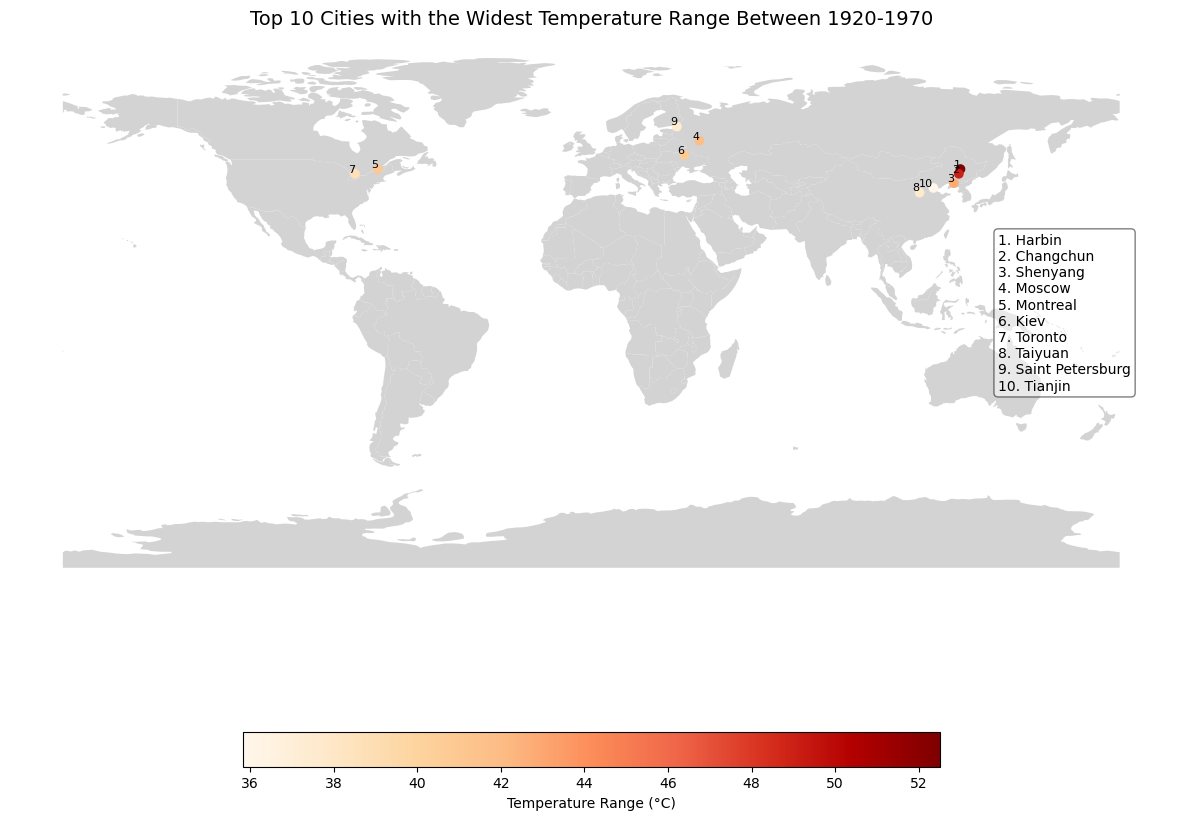

In [12]:
    # Create a GeoDataFrame from the top cities data with the correct column for plotting
    top_cities_gdf = gpd.GeoDataFrame(
        top_cities_geo,
        geometry=gpd.points_from_xy(top_cities_geo.Longitude, top_cities_geo.Latitude)
    )

    # Plot the map as per the provided specifications
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))  # Adjusted the size
    world.plot(ax=ax, color='lightgrey')

    # Plot the top cities with temperature range color map
    top_cities_gdf.plot(ax=ax, column='temp_range', cmap='OrRd', legend=True,
                        legend_kwds={'label': "Temperature Range (°C)",
                                    'orientation': "horizontal",
                                    'shrink': 0.6})

    # Add city numbers to the map
    for idx, row in top_cities_gdf.iterrows():
        plt.text(row.geometry.x, row.geometry.y, str(idx+1), fontsize=8, ha='right', va='bottom')

    # Create a list of city labels with their numbers
    city_labels = [f"{idx+1}. {row['City']}" for idx, row in top_cities_gdf.iterrows()]
    city_labels_str = "\n".join(city_labels)
    plt.text(0.85, 0.5, city_labels_str, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5))

    # Add title and other details to the plot
    plt.title('Top 10 Cities with the Widest Temperature Range Between 1920-1970', fontsize=14)
    ax.set_axis_off()  # Remove the axis

    plt.show()

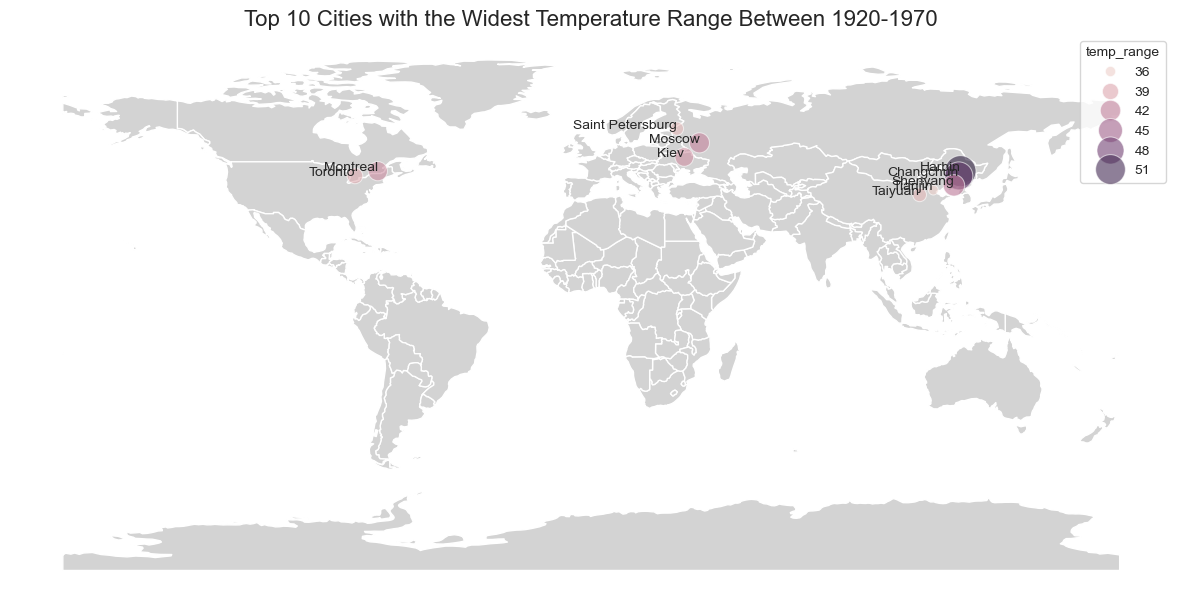

In [17]:
import seaborn as sns

# Set the style of the visualization
sns.set_style("white")

# Create a base map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
world.plot(ax=ax, color='lightgrey')

# Scatter plot with seaborn
# We use the size of the points to represent the temperature range (temp_range)
# The color of the points represents the average temperature (we'll use the mean for the illustration purposes here)
sns.scatterplot(x=top_cities_gdf['Longitude'], y=top_cities_gdf['Latitude'],
                size=top_cities_gdf['temp_range'], 
                hue=top_cities_gdf['temp_range'], # Here you may want to use average temperature instead
                sizes=(50, 500), # Adjust the range of sizes for better visualization
                alpha=0.6, ax=ax)

# Add city names next to the points
for idx, row in top_cities_gdf.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['City'], fontsize=10, ha='right')

# Remove the axis for a cleaner look
ax.set_axis_off()

# Add a title to the plot
plt.title('Top 10 Cities with the Widest Temperature Range Between 1920-1970', fontsize=16)

# Show the plot
plt.show()
